# Machine Learnig Bootcamp
# HomeWork 5

# Dataset
In this homework, we continue using the fuel efficiency dataset. Download it from here.<br>

You can do it with wget:<br>

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv<br>
The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').<br>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
Data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [31]:
Data

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


# Preparing the dataset
Preparation:

Fill missing values with zeros.<br>
Do train/validation/test split with 60%/20%/20% distribution.<br>
Use the train_test_split function and set the random_state parameter to 1.<br>
Use DictVectorizer(sparse=True) to turn the dataframes into matrices.<br>

In [32]:
Data.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [33]:
fill_with_zeros = Data.fillna(0)

In [34]:
fill_with_zeros

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,0.0,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,0.0,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,0.0,15.101802
9700,180,0.0,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [35]:
fill_with_zeros.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(fill_with_zeros, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [44]:
df_test.shape, df_train.shape, df_val.shape

((1941, 10), (5822, 10), (1941, 10))

In [38]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [39]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [40]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [41]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [42]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

In [45]:
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

# Question 1
# Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.<br>

Train a model with max_depth=1.<br>
Which feature is used for splitting the data?<br>

'vehicle_weight'<br>
'model_year'<br>
'origin'<br>
'fuel_type'<br>

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb 

In [51]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [52]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



# Question 2
# Train a random forest regressor with these parameters:<br>

n_estimators=10<br>
random_state=1<br>
n_jobs=-1 (optional - to make training faster)<br>
What's the RMSE of this model on the validation data?<br>

0.045<br>
0.45<br>
4.5<br>
45.0<br>

In [53]:
rf = RandomForestRegressor(n_estimators=10, random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [54]:
from sklearn.metrics import root_mean_squared_error

y_pred = rf.predict(X_val)
print("RMSE:", root_mean_squared_error(y_val, y_pred))

RMSE: 0.45997775573361477


# Question 3
# Now let's experiment with the n_estimators parameter<br>

Try different values of this parameter from 10 to 200 with step 10.<br>
Set random_state to 1.<br>
Evaluate the model on the validation dataset.<br>
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.<br>

10<br>
25<br>
80<br>
200<br>
If it doesn't stop improving, use the latest iteration number in your answer.<br>

In [62]:
score = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1,n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    score.append((n, rmse))

score

[(10, 0.45997775573361477),
 (20, 0.45365906507838477),
 (30, 0.45074274602790043),
 (40, 0.4480067936304669),
 (50, 0.44615128055079933),
 (60, 0.44526583379592344),
 (70, 0.444609824913853),
 (80, 0.44489319803906885),
 (90, 0.4447241129599527),
 (100, 0.4443178455925073),
 (110, 0.44313500906534525),
 (120, 0.44352857238987636),
 (130, 0.44336417807088435),
 (140, 0.4431801001185647),
 (150, 0.44290987571705587),
 (160, 0.4426293654180784),
 (170, 0.4427157028806333),
 (180, 0.4423616814462061),
 (190, 0.4425785032007027),
 (200, 0.44260685365230207)]

In [ ]:
score_est = pd.DataFrame(score, columns=['n_estimators', 'rmse'])


Text(0.5, 1.0, 'RMSE vs Number of Estimators in Random Forest')

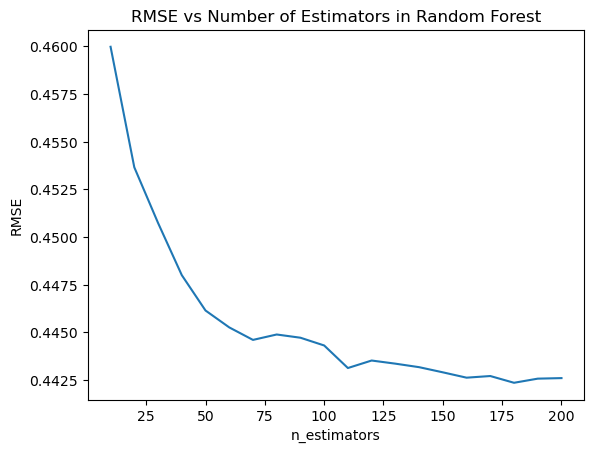

In [65]:
plt.plot(score_est.n_estimators, score_est.rmse)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Estimators in Random Forest')

# Question 4
# Let's select the best max_depth:<br>

Try different values of max_depth: [10, 15, 20, 25]<br>
For each of these values,<br>
try different values of n_estimators from 10 till 200 (with step 10)<br>
calculate the mean RMSE<br>
Fix the random seed: random_state=1<br>
What's the best max_depth, using the mean RMSE?<br>

10
15
20
25

In [66]:
score = []
for depth in [10,15,20,25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=1,n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        score.append((depth, n, rmse))

score_est = pd.DataFrame(score, columns=['max_depth', 'n_estimators', 'rmse'])


Text(0.5, 1.0, 'RMSE vs Max Depth in Random Forest')

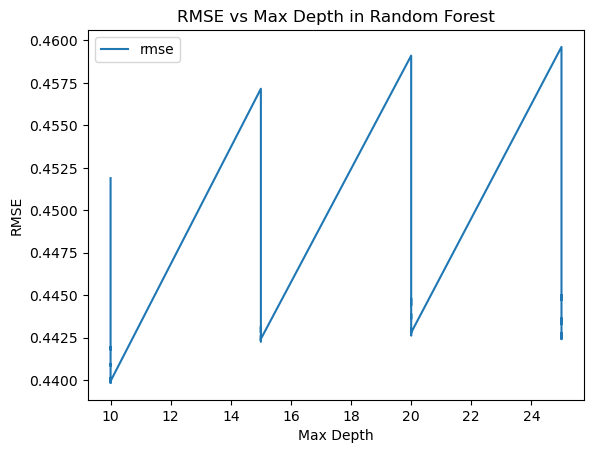

In [69]:
score_est.plot(x='max_depth', y='rmse', kind='line')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('RMSE vs Max Depth in Random Forest')

# Question 5
# We can extract feature importance information from tree-based models.<br>

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split.<br> This gain is quite useful in understanding what are the important features for tree-based models.<br>

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.<br>

For this homework question, we'll find the most important feature:<br>

Train the model with these parameters:<br>
n_estimators=10,<br>
max_depth=20,<br>
random_state=1,<br>
n_jobs=-1 (optional)<br>
Get the feature importance information from this model<br>
What's the most important feature (among these 4)?<br>

vehicle_weight<br>
horsepower<br>
acceleration<br>
engine_displacement<br>

In [70]:
rf = RandomForestRegressor(n_estimators=10,max_depth=20, random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [71]:
importance = rf.feature_importances_
importance

array([1.14707165e-02, 3.81809750e-04, 3.11842085e-04, 3.26932342e-03,
       3.43693411e-04, 3.36671988e-04, 1.60402148e-02, 3.18229841e-03,
       2.35867094e-03, 1.59113306e-03, 4.76103046e-04, 5.20358083e-04,
       5.55151959e-04, 9.59162013e-01])

In [72]:
features  = dv.get_feature_names_out().tolist()
features

['acceleration',
 'drivetrain=All-wheel drive',
 'drivetrain=Front-wheel drive',
 'engine_displacement',
 'fuel_type=Diesel',
 'fuel_type=Gasoline',
 'horsepower',
 'model_year',
 'num_cylinders',
 'num_doors',
 'origin=Asia',
 'origin=Europe',
 'origin=USA',
 'vehicle_weight']

In [73]:
important_features = pd.DataFrame({'feature': features, 'importance': importance}).sort_values(by='importance', ascending=False)
important_features

,feature,importance
13,vehicle_weight,0.959162
6,horsepower,0.016040
0,acceleration,0.011471
3,engine_displacement,0.003269
7,model_year,0.003182
8,num_cylinders,0.002359
9,num_doors,0.001591
12,origin=USA,0.000555
11,origin=Europe,0.000520
10,origin=Asia,0.000476


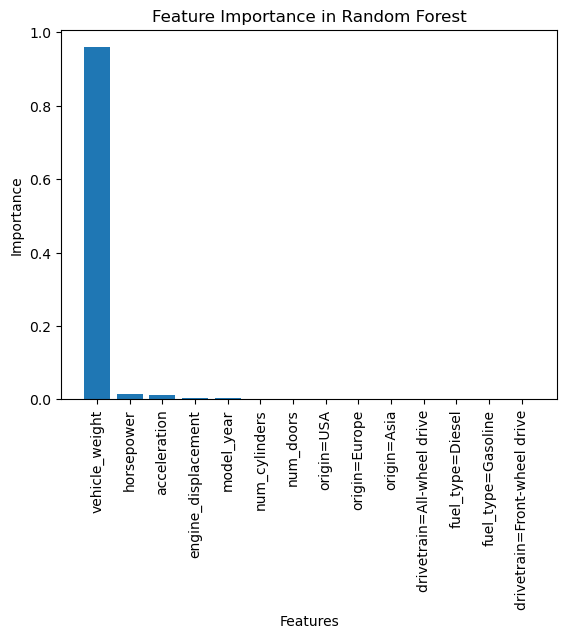

In [74]:
plt.bar(important_features['feature'], important_features['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

# Question 6
# Now let's train an XGBoost model! For this question, we'll tune the eta parameter:<br>

Install XGBoost<br>
Create DMatrix for train and validation<br>
Create a watchlist<br>
Train a model with these parameters for 100 rounds:<br>
xgb_params = {<br>
    'eta': 0.3, <br>
    'max_depth': 6,<br>
    'min_child_weight': 1,<br>
    <br>
    'objective': 'reg:squarederror',<br>
    'nthread': 8,<br>
    
    'seed': 1,<br>
    'verbosity': 1,<br>
}
Now change eta from 0.3 to 0.1.<br>

Which eta leads to the best RMSE score on the validation dataset?<br>

0.3<br>
0.1<br>
Both give equal value<br>

In [85]:
dtrain = xgb.DMatrix(X_train, label=y_train,feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val,feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'eval')]

In [76]:
dtrain

In [100]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=100, evals=watchlist)
y_pred = model.predict(dval)
mean3 = root_mean_squared_error(y_val, y_pred)

In [101]:
print(output.stdout)

[0]	train-rmse:1.81393	eval-rmse:1.85444
[1]	train-rmse:1.31919	eval-rmse:1.35353
[2]	train-rmse:0.98120	eval-rmse:1.01316
[3]	train-rmse:0.75443	eval-rmse:0.78667
[4]	train-rmse:0.60680	eval-rmse:0.64318
[5]	train-rmse:0.51381	eval-rmse:0.55664
[6]	train-rmse:0.45470	eval-rmse:0.50321
[7]	train-rmse:0.41881	eval-rmse:0.47254
[8]	train-rmse:0.39534	eval-rmse:0.45509
[9]	train-rmse:0.38038	eval-rmse:0.44564
[10]	train-rmse:0.37115	eval-rmse:0.43896
[11]	train-rmse:0.36361	eval-rmse:0.43594
[12]	train-rmse:0.35850	eval-rmse:0.43558
[13]	train-rmse:0.35365	eval-rmse:0.43394
[14]	train-rmse:0.35025	eval-rmse:0.43349
[15]	train-rmse:0.34666	eval-rmse:0.43362
[16]	train-rmse:0.34459	eval-rmse:0.43378
[17]	train-rmse:0.34128	eval-rmse:0.43405
[18]	train-rmse:0.33822	eval-rmse:0.43391
[19]	train-rmse:0.33709	eval-rmse:0.43374
[20]	train-rmse:0.33553	eval-rmse:0.43376
[21]	train-rmse:0.33243	eval-rmse:0.43453
[22]	train-rmse:0.33031	eval-rmse:0.43510
[23]	train-rmse:0.32815	eval-rmse:0.43601
[2

In [102]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=100, evals=watchlist)
y_pred = model.predict(dval)
mean1 = root_mean_squared_error(y_val, y_pred)

In [103]:
print(output.stdout)

[0]	train-rmse:2.28944	eval-rmse:2.34561
[1]	train-rmse:2.07396	eval-rmse:2.12434
[2]	train-rmse:1.88066	eval-rmse:1.92597
[3]	train-rmse:1.70730	eval-rmse:1.74987
[4]	train-rmse:1.55163	eval-rmse:1.59059
[5]	train-rmse:1.41247	eval-rmse:1.44988
[6]	train-rmse:1.28796	eval-rmse:1.32329
[7]	train-rmse:1.17660	eval-rmse:1.20930
[8]	train-rmse:1.07736	eval-rmse:1.10830
[9]	train-rmse:0.98883	eval-rmse:1.02009
[10]	train-rmse:0.91008	eval-rmse:0.94062
[11]	train-rmse:0.84030	eval-rmse:0.87100
[12]	train-rmse:0.77874	eval-rmse:0.80916
[13]	train-rmse:0.72417	eval-rmse:0.75465
[14]	train-rmse:0.67626	eval-rmse:0.70780
[15]	train-rmse:0.63402	eval-rmse:0.66672
[16]	train-rmse:0.59690	eval-rmse:0.63062
[17]	train-rmse:0.56447	eval-rmse:0.60016
[18]	train-rmse:0.53619	eval-rmse:0.57383
[19]	train-rmse:0.51138	eval-rmse:0.55044
[20]	train-rmse:0.48983	eval-rmse:0.53064
[21]	train-rmse:0.47135	eval-rmse:0.51451
[22]	train-rmse:0.45501	eval-rmse:0.49998
[23]	train-rmse:0.44120	eval-rmse:0.48790
[2

In [105]:
mean1, mean3

(0.42622800553359225, 0.45017755678087246)